## Fraud Detection in Banking System

In [1]:
# Importing Required modules

## Data loading, processing and for more
import pandas as pd
import numpy as np

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Analysing the Dataset

In [2]:
# Read the data and show first 5 rows
# read_csv() --> Read a comma-separated values (csv) file into DataFrame.
# head(N) --> show the first N records of dataset
data = pd.read_csv("banking_data.csv")
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
# Print info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
# shape --> dimensionality of dataset
print(data.shape)

(594643, 10)


In [5]:
# Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset’s distribution, excluding NaN values.
print(data.describe())

                step         amount          fraud
count  594643.000000  594643.000000  594643.000000
mean       94.986827      37.890135       0.012108
std        51.053632     111.402831       0.109369
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.900000       0.000000
75%       139.000000      42.540000       0.000000
max       179.000000    8329.960000       1.000000


# Data visualization

Fraud Cases:  7200
Valid Transactions: 587443
Ratio of Fraud data : Valid data =  0.012256508291017171


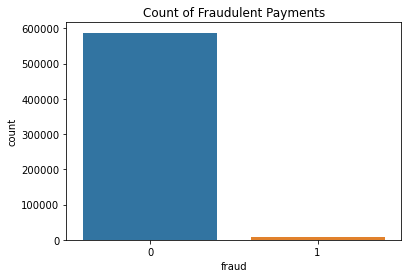

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['fraud'] == 1]
valid = data[data['fraud'] == 0]
# Fraction of outliers
outlierFraction = len(fraud)/float(len(valid))
# Print the Fraud cases
print("Fraud Cases: ",len(data[data['fraud'] == 1]))
print("Valid Transactions:",len(data[data['fraud'] == 0]))
print("Ratio of Fraud data : Valid data = " , outlierFraction)
# Show the number of fraud and non fraud transactions graphically
sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()

In [7]:
# Print the statistics of fraud transaction
print("Amount details of the fraudulent transaction")
fraud.amount.describe()

Amount details of the fraudulent transaction


count    7200.000000
mean      530.926551
std       835.587112
min         0.030000
25%       159.980000
50%       319.175000
75%       548.977500
max      8329.960000
Name: amount, dtype: float64

<AxesSubplot:>

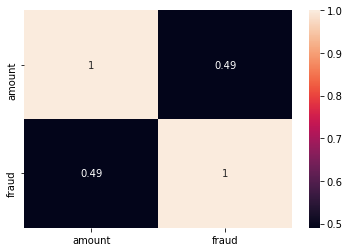

In [8]:
# Dependency of fraud cases on the attribute "amount".
# Correlation matrix: A correlation matrix is simply a table which displays the correlation coefficients 
# for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.
htmap = data[["amount","fraud"]].corr()
sns.heatmap(htmap,annot=True)

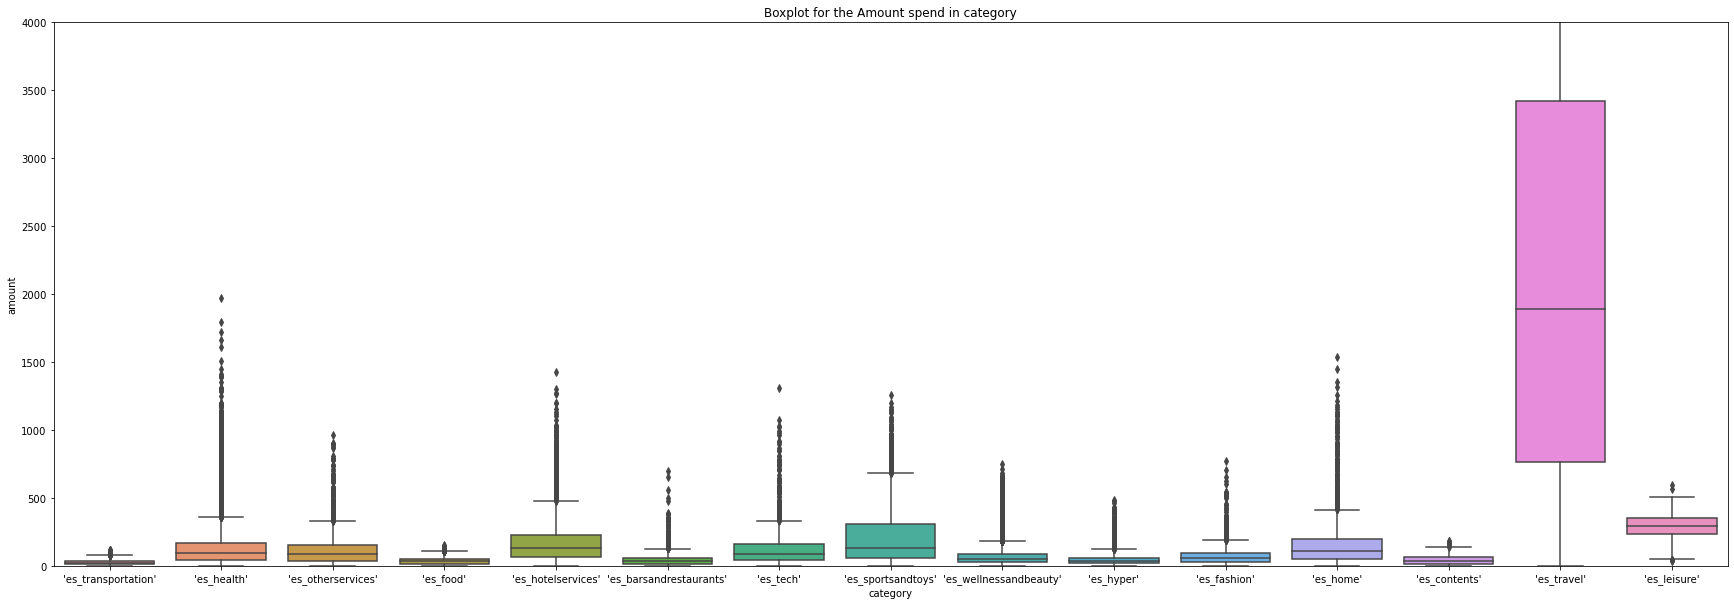

In [9]:
# Boxplots of the amounts in fraud and non-fraud data 
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.show()

We can see the mean amount and fraud percent by category below. Looks like leisure and the travel is the most selected 
categories for fraudsters. Fraudsters chose the categories which people spend more on average.
Let's confirm this hypothesis by checking the fraud and non-fraud amount transacted.

In [10]:
# Concatenate two dataframes of fraud and non-fraud data
# To axis=1 to concatenate against column
pd.concat([fraud.groupby('category')['amount'].mean(),valid.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000


Age: Categorized age <br><b>0</b>: <= 18<br>
                     <b>1</b>: 19-25<br>
                     <b>2</b>: 26-35 <br>
                     <b>3</b>: 36-45 <br>
                     <b>4</b>: 46:55 <br>
                     <b>5</b>: 56:65 <br>
                     <b>6</b>: > 65   <br>
                     <b>U</b>: Unknown <br>


In [11]:
# Print the fraud percentage age wise
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


From this we can conclude that fraud occurs more in ages equal and below age of 18.
One reason for it might be, fraudsters thinking that there would be less consequences if they show their age below 18 as laws are not that much severe for young population.

# Data Preprocessing

In [12]:
# Removing uneccessary data
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [13]:
# Dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)
data_reduced.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [14]:
# Turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# Transforming categorical values to numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)

In [15]:
# Print the modified dataset
data_reduced.info()
data_reduced.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  int16  
 2   age       594643 non-null  int8   
 3   gender    594643 non-null  int8   
 4   merchant  594643 non-null  int8   
 5   category  594643 non-null  int8   
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int16(1), int64(2), int8(4)
memory usage: 17.0 MB


,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


<AxesSubplot:>

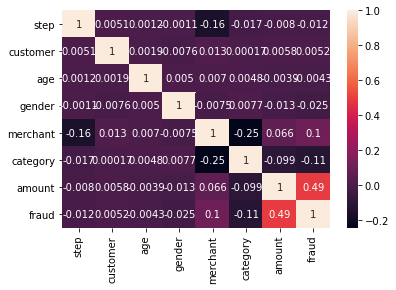

In [16]:
# Plot heatmap
sns.heatmap(data_reduced.corr(),annot=True)

Let's define our independent variable 'X' and dependant/target variable 'Y'

In [17]:
X = data_reduced.drop(['fraud'],axis=1)
Y = data['fraud']

X.head()

,step,customer,age,gender,merchant,category,amount
0,0,210,4,2,30,12,4.55
1,0,2753,2,2,30,12,39.68
2,0,2285,4,1,18,12,26.89
3,0,1650,3,2,30,12,17.25
4,0,3585,5,2,30,12,35.72


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [19]:
# Count of fraud transactions
Y[Y==1].count()

7200

# Training and Testing

In [20]:
print(X.shape)
print(Y.shape)
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(594643, 7)
(594643,)


In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)
#random_state is basically used for reproducing problem the same every time it is run


## Random Forest Classifier

In [22]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [23]:
# Evaluating the classifier printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
#Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
#Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
#Recall is the ratio of correctly predicted positive observations to the all observations in actual class

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
#F1 Score is the weighted average of Precision and Recall.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))
#The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications.
#The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.


The model used is Random Forest classifier
The accuracy is 0.9961825963389922
The precision is 0.9015846538782318
The recall is 0.76287932251235
The F1-Score is 0.8264525993883792
The Matthews correlation coefficient is 0.8274784460442721


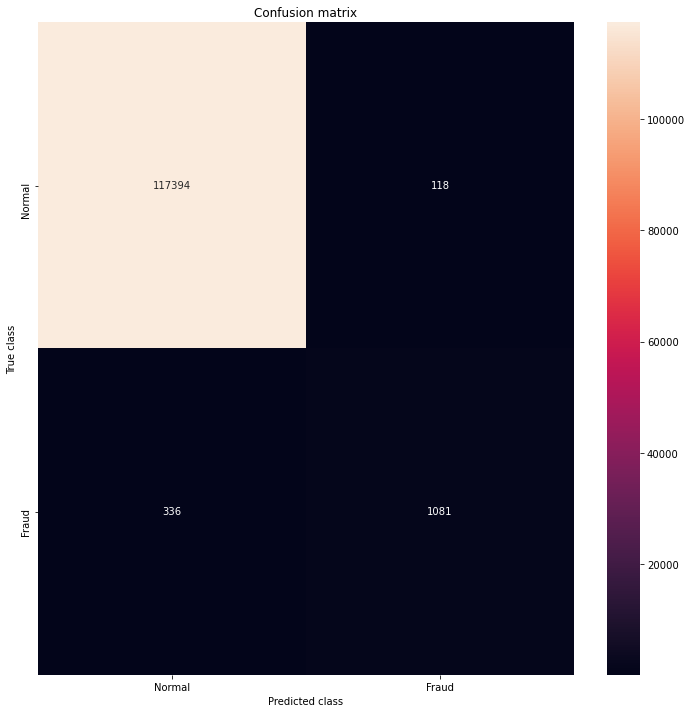

In [24]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
        yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Support Vector Classifier

In [25]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(xTrain, yTrain)
yPred2 = SVCmodel.predict(xTest)

C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [26]:
# Evaluating the classifier printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred2 != yTest).sum()
print("The model used is Support Vector Classifier")

acc = accuracy_score(yTest, yPred2)
print("The accuracy is {}".format(acc))
#Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

prec = precision_score(yTest, yPred2)
print("The precision is {}".format(prec))
#Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

rec = recall_score(yTest, yPred2)
print("The recall is {}".format(rec))
#Recall is the ratio of correctly predicted positive observations to the all observations in actual class

f1 = f1_score(yTest, yPred2)
print("The F1-Score is {}".format(f1))
#F1 Score is the weighted average of Precision and Recall.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

MCC = matthews_corrcoef(yTest, yPred2)
print("The Matthews correlation coefficient is {}".format(MCC))
#The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications.
#The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.


The model used is Support Vector Classifier
The accuracy is 0.990515349494236
The precision is 0.9616613418530351
The recall is 0.21242060691601977
The F1-Score is 0.34797687861271676
The Matthews correlation coefficient is 0.44964528546332094
